<a href="https://colab.research.google.com/github/thap/python_basics_to_advanced/blob/master/unsupervised/NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

     |████████████████████████████████| 332.1MB 95kB/s 
     |████████████████████████████████| 419kB 39.1MB/s 
     |████████████████████████████████| 3.0MB 26.0MB/s 


1.14.0


'/device:GPU:0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/data/unsupervised/')
print(os.getcwd())
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/data/unsupervised
artists.csv				    scrobbler-small-sample.csv
company-stock-movements-2010-2015-incl.csv  seeds.csv
eurovision-2016.csv			    seeds-width-vs-length.csv
fish.csv				    wikipedia-vectors.csv
lcd-digits.csv				    wikipedia-vocabulary-utf8.txt
preprocessing.md			    wine.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)
print(titles)

['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie', 'Google Search', 'Tumblr', 'Hypertext Transfer Protocol', 'Social search', 'Firefox', 'LinkedIn', 'Global warming', 'Nationally Appropriate Mitigation Action', 'Nigel Lawson', 'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org', 'Greenhouse gas emissions by the United States', '2010 United Nations Climate Change Conference', '2007 United Nations Climate Change Conference', 'Angelina Jolie', 'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones', 'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning', 'Anne Hathaway', 'Jennifer Aniston', 'France national football team', 'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao', 'Zlatan Ibrahimović', 'Colombia national football team', '2014 FIFA World Cup qualification', 'Football', 'Neymar', 'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', 'Doxycycline', 'Leukemia', 'Gout', 'Hepatitis C', 'Prednisone', 'Fever', 'Gabapentin', 'Lymphoma', 'Chad 

In [7]:
from sklearn.decomposition import NMF

model = NMF(n_components=6)
model.fit(articles)
nmf_features = model.transform(articles)
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40492589e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66640550e-01]
 [3.81998468e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98671478e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81763442e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85547855e-01]
 [1.29271164e-02 1.37900710e-02 7.76386952e-03 3.34412041e-02
  0.00000000e+00 3.34543393e-01]
 [0.00000000e+00 0.00000000e+00 2.06760350e-02 0.00000000e+00
  6.04443126e-03 3.59083085e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.91007837e-01]
 [1.54250622e-02 1.42828577e-02 3.76666553e-03 2.37060239e-02
  2.62599384e-02 4.80804553e-01]
 [1.11721714e-02 3.13702680e-02 3.09511575e-02 6.56855366e-02
  1.96661026e-02 3.38310480e-01]
 [0.00000000e+00 0.00000000e+00 5.30764270e-01 0.0

In [8]:
import pandas as pd

df = pd.DataFrame(nmf_features, index=titles)
print(df.loc['Anne Hathaway'])
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575586
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422288
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [10]:
with open('wikipedia-vocabulary-utf8.txt', 'r') as f:
  words = f.read().split()
  print(words)

['aaron', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abbas', 'abbey', 'abbreviated', 'abbreviation', 'abc', 'abdomen', 'abdominal', 'abdul', 'abel', 'abilities', 'ability', 'able', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolish', 'abolished', 'abolishing', 'abolition', 'aboriginal', 'abortion', 'abraham', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absorption', 'abstract', 'abstraction', 'absurd', 'abu', 'abundance', 'abundant', 'abuse', 'abused', 'abuses', 'abusive', 'academia', 'academic', 'academics', 'academies', 'academy', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessing', 'accession', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'acclaim', 'acclaimed', 'accolades', 'accommodate', 'acco

In [11]:
import pandas as pd

components_df = pd.DataFrame(model.components_, columns=words)
print(components_df.shape)
component = components_df.iloc[3,:]
print(component.nlargest())

(6, 13125)
film       0.628012
award      0.253186
starred    0.245337
role       0.211497
actress    0.186438
Name: 3, dtype: float64


In [13]:
digit = pd.read_csv('lcd-digits.csv', header=None)
digit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
digit.shape

(100, 104)

In [19]:
type(digit[0])

pandas.core.series.Series

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


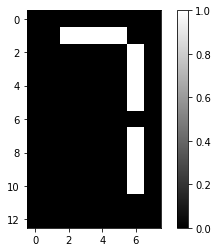

In [21]:
from matplotlib import pyplot as plt

bitmap = digit.iloc[0,:].values.reshape(13, 8)
print(bitmap)
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


In [0]:
def show(component):
  bitmap = component.reshape((13, 8))
  plt.figure()
  plt.imshow(bitmap, cmap='gray', interpolation='nearest')
  plt.colorbar()
  plt.show()

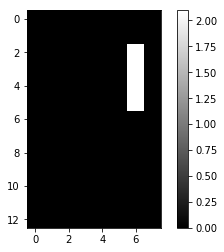

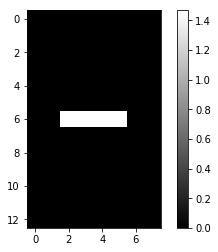

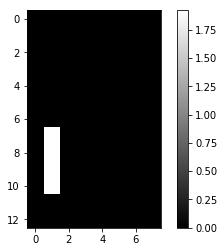

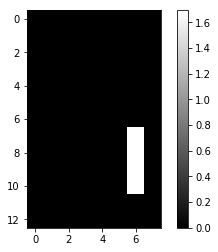

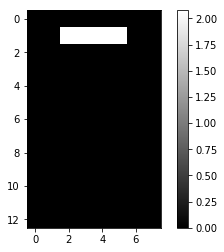

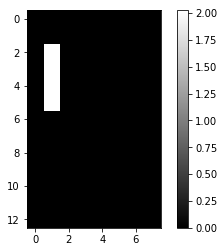

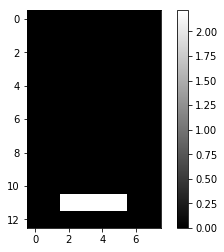

In [29]:
from sklearn.decomposition import NMF

model = NMF(n_components=7)
features = model.fit_transform(digit)
for component in model.components_:
  show(component)

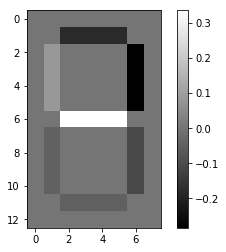

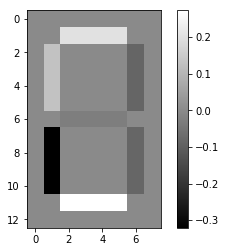

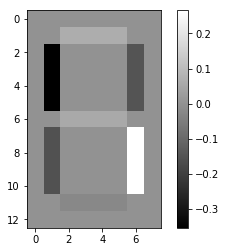

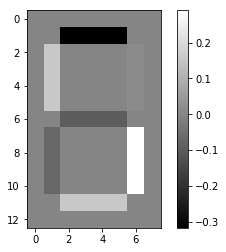

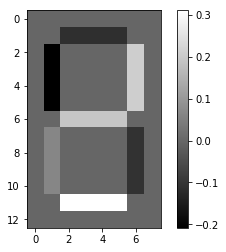

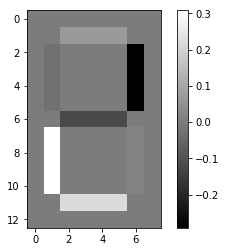

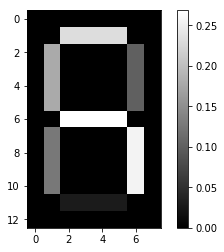

In [30]:
from sklearn.decomposition import PCA

model = PCA(n_components=7)
features = model.fit_transform(digit)
for component in model.components_:
  show(component)

In [32]:
import pandas as pd
from sklearn.preprocessing import normalize

norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
article = df.loc['Cristiano Ronaldo']
similarities = df.dot(article)
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [37]:
df = pd.read_csv('artists.csv', header)
df.head()

,Massive Attack
0,Sublime
1,Beastie Boys
2,Neil Young
3,Dead Kennedys
4,Orbital


In [50]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('scrobbler-small-sample.csv')
artists = csr_matrix((df.playcount, (df.artist_offset, df.user_offset)))
artists.shape

(111, 500)

In [54]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

scaler = MaxAbsScaler()
nmf = NMF(n_components=20)
normalizer = Normalizer()
pipeline = make_pipeline(scaler, nmf, normalizer)
norm_features = pipeline.fit_transform(artists)
norm_features.shape

(111, 20)

In [55]:
artist_names = pd.read_csv('artists.csv', header=None)
artist_names.shape

(111, 1)

In [65]:
artist_names[artist_names[0].str.contains('Bruce')]

,0
68,Bruce Springsteen


In [69]:
import pandas as pd

df = pd.DataFrame(norm_features, index=artist_names[0])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,,
Massive Attack,0.000000,0.000000,0.000000,0.000000,0.005823,0.000000,0.000000,0.056306,0.000000,0.000000,0.005312,0.000000,0.001426,0.997980,0.000000,0.000000,0.000000,0.000000,0.028320,0.000000
Sublime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005752,0.000000,0.000000,0.000000,0.000000,0.999983,0.000000
Beastie Boys,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Neil Young,0.266968,0.000000,0.000000,0.057749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.959718,0.063604,0.000000,0.016980,0.000000
Dead Kennedys,0.000000,0.013451,0.000000,0.588785,0.000000,0.000000,0.000000,0.000000,0.000000,0.739410,0.000000,0.000000,0.139123,0.000000,0.000000,0.080150,0.000000,0.283980,0.000000,0.000000
Orbital,0.000000,0.227360,0.058930,0.000000,0.186442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222387,0.146942,0.905963,0.000000,0.000000,0.000000,0.135117,0.000000,0.000000
Miles Davis,0.027738,0.000000,0.000000,0.000000,0.000000,0.000000,0.036578,0.382209,0.000000,0.004790,0.106459,0.000000,0.286763,0.000000,0.000000,0.762322,0.000000,0.394479,0.146528,0.000000
Leonard Cohen,0.449200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007592,0.000000,0.000000,0.282352,0.383739,0.000000,0.755767,0.000000,0.000000,0.000000,0.000000
Van Morrison,0.178226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184572,0.252631,0.000000,0.000000,0.000000,0.148190,0.198559,0.000000,0.899422,0.000000,0.000000,0.000000,0.000000


In [70]:
artist = df.loc['Bruce Springsteen']
similarities = df.dot(artist)
print(similarities.nlargest())

0
Bruce Springsteen    1.000000
Neil Young           0.956541
Van Morrison         0.875613
Leonard Cohen        0.868756
Bob Dylan            0.862228
dtype: float64
